# Convolutional Neural Networks (CNNs) — Tutorial

A hands-on, step-by-step Python notebook style tutorial that starts with simple CNNs and culminates with classic architectures like AlexNet, VGG and brief notes on ResNet/Inception. Contains runnable code cells (Keras + PyTorch), explanations, visualizations and exercises.

## Table of contents

1. Introduction & learning goals
2. Prerequisites & environment
3. Key concepts (conv layer, kernels, stride, padding, pooling, activations, receptive field, BN, dropout)
4. Simple CNN on MNIST (Keras) — build, train, visualize
5. Deeper CNN on CIFAR-10 (Keras) — augmentation, callbacks, regularization
6. PyTorch: Simple CNN + training loop + debugging tips
7. Transfer Learning: using pretrained models (PyTorch) — feature-extractor vs fine-tune
8. Implementing AlexNet (PyTorch) — full architecture, tips, training on CIFAR-10 / Tiny ImageNet
9. Overview of later architectures: VGG, Inception, ResNet (intuition & code pointers)
10. Model sizing, FLOPs & parameter counting (how to think about complexity)
11. Common pitfalls, debugging & performance tuning
12. Exercises and extensions
13. References & further reading

## 1. Introduction & learning goals

By the end of this notebook you will be able to:

* Understand convolution, pooling, and how CNNs process images.
* Build a small CNN in Keras and PyTorch and train it on MNIST/CIFAR-10.
* Apply data augmentation and regularization to improve generalization.
* Use pretrained networks and understand transfer learning choices.
* Implement AlexNet in PyTorch and know how to expand toward VGG/ResNet.

## 2. Prerequisites & environment

* Python 3.8+
* GPU recommended (for deeper nets like AlexNet) but CPU works for small experiments.
* Libraries used in code examples below:

  * TensorFlow / Keras (`tensorflow>=2.10`)
  * PyTorch (`torch`, `torchvision`)
  * NumPy, matplotlib, seaborn (optional)

Install (example):

```bash
pip install numpy matplotlib seaborn tensorflow torchvision torch tqdm scikit-learn
```

Open a Colab or local Jupyter notebook and run cells as you go.

## 3. Quick conceptual primer

### Convolutional layer

* Input: H x W x C_in feature map.
* Kernel/filter: k x k x C_in; slides using stride `s` and padding `p`.
* Output: H_out x W_out x C_out where C_out = number of filters.

Formula for output size (single spatial axis):

```
out = floor((in + 2*p - k) / s) + 1
```

### Pooling

* Downsamples spatial resolution (max pooling, average pooling).
* Reduces parameters and adds spatial invariance.

### Activation

* ReLU commonly used: `f(x)=max(0,x)`
* LeakyReLU, SELU, GELU also used depending on architecture.

### BatchNorm

* Normalizes activations per-batch to stabilize and accelerate training.

### Dropout

* Randomly zeroes activations during training for regularization.

### Receptive field

* The region in input image that affects a particular activation in deeper layers—grows with depth and kernel sizes.


## 4. Simple CNN on MNIST (Keras)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,866 (413.54 KB)

 Trainable params: 105,866 (413.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.7462 - loss: 0.8131 - val_accuracy: 0.9750 - val_loss: 0.0840
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9537 - loss: 0.1583 - val_accuracy: 0.9860 - val_loss: 0.0526
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9686 - loss: 0.1056 - val_accuracy: 0.9867 - val_loss: 0.0479
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9725 - loss: 0.0923 - val_accuracy: 0.9892 - val_loss: 0.0416
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9779 - loss: 0.0752 - val_accuracy: 0.9872 - val_loss: 0.0399
313/313 - 2s - 8ms/step - accuracy: 0.9878 - loss: 0.0379
[0.03786460682749748, 0.9878000020980835]


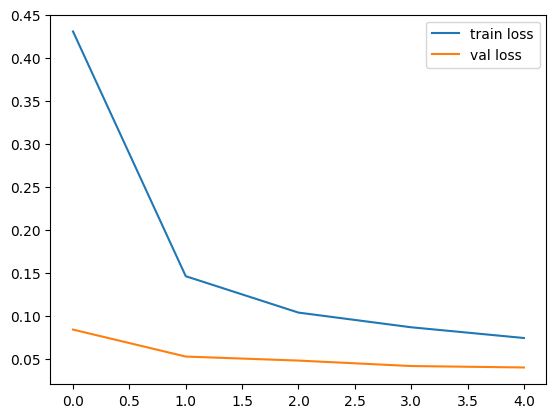

In [6]:
# Keras MNIST example
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# scale and reshape
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# One-hot labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Model
model = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPool2D(2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# Evaluate
print(model.evaluate(x_test, y_test, verbose=2))

# Plot training curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


**Notes**: This small net reaches ~99% train accuracy and ~99% test accuracy on MNIST with more epochs and minor tuning.

(3, 3, 1, 16)


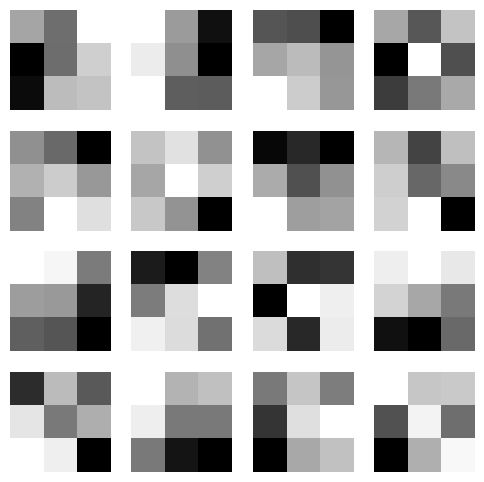

In [7]:
# Visualize filters of the first conv layer in Keras
weights = model.layers[0].get_weights()[0]
print(weights.shape) # (3,3,1,16) for first conv layer


fig, axs = plt.subplots(4,4, figsize=(6,6))
for i in range(16):
  f = weights[:,:,:,i]
  axs[i//4, i%4].imshow(f.squeeze(), cmap='gray')
  axs[i//4, i%4].axis('off')
plt.show()

## 5. Deeper CNN on CIFAR-10 (Keras) — augmentation, callbacks

CIFAR-10 images are 32x32x3; more challenging. Use augmentation and weight decay.

In [1]:
import tensorflow as tf
print("GPUs Available:", tf.config.list_physical_devices('GPU'))


GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import mixed_precision

# Check GPU
print("GPUs Available:", tf.config.list_physical_devices('GPU'))

# Optional: enable mixed precision
mixed_precision.set_global_policy('mixed_float16')

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train.astype('float32')/255.0, x_test.astype('float32')/255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1
)

# Model
def make_cifar_model():
    inputs = layers.Input(shape=(32,32,3))
    x = layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax', dtype='float32')(x)  # force float32 output
    return models.Model(inputs, outputs)

with tf.device('/GPU:0'):
    model = make_cifar_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5, verbose=1),
    tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)
]

# Train
train_gen = datagen.flow(x_train, y_train, batch_size=512, subset=None)
model.fit(train_gen, epochs=10, validation_data=(x_test, y_test), callbacks=callbacks)


GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 56s 395ms/step - accuracy: 0.2155 - loss: 2.0916 - val_accuracy: 0.4517 - val_loss: 1.5029 - learning_rate: 0.0010
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 295ms/step - accuracy: 0.4341 - loss: 1.5537 - val_accuracy: 0.5543 - val_loss: 1.2503 - learning_rate: 0.0010
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - accuracy: 0.5046 - loss: 1.3766 - val_accuracy: 0.5813 - val_loss: 1.1718 - learning_rate: 0.0010
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 358ms/step - accuracy: 0.5718 - loss: 1.2061 - val_accuracy: 0.6262 - val_loss: 1.0698 - learning_rate: 0.0010
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 303ms/step - accuracy: 0.6117 - loss: 1.0959 - val_accuracy: 0.6850 - val_loss: 0.9018 - learning_rate: 0.0010
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 290ms/step - accuracy: 0.6289 - loss: 1.0460 - val_accuracy: 0.6771 - val_loss: 0.9281 - learning_rate: 0.0010
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - accuracy: 0.6478 - loss: 0.

**Practical tips:** use `LearningRateScheduler` or `CosineDecay`, monitor validation accuracy, and consider SGD with momentum for better generalization.

## 6. PyTorch: Simple CNN + training loop


In [3]:
# PyTorch simple CNN (CIFAR-10)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914,0.4822,0.4465),(0.2023,0.1994,0.2010))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,32,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*8*8, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop (one epoch example)
model.train()
for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, loss {running_loss/len(trainloader):.4f}')

100%|██████████| 170M/170M [00:03<00:00, 47.7MB/s]


Epoch 1, loss 1.4825
Epoch 2, loss 1.1441
Epoch 3, loss 0.9967
Epoch 4, loss 0.9064
Epoch 5, loss 0.8216
Epoch 6, loss 0.7539
Epoch 7, loss 0.7043
Epoch 8, loss 0.6489
Epoch 9, loss 0.5994
Epoch 10, loss 0.5612


**Debugging tips**: start with a very small dataset, ensure loss decreases, use gradient norm clipping if exploding.

## 7. Transfer learning (PyTorch)

Use `torchvision.models` for pretrained AlexNet/VGG/ResNet.

In [4]:
import torchvision.models as models
alex = models.alexnet(pretrained=True)  # loads pretrained weights
# Option A: feature extraction (freeze backbone)
for p in alex.features.parameters():
    p.requires_grad = False
# Replace final classifier for CIFAR-10
alex.classifier[6] = nn.Linear(alex.classifier[6].in_features, 10)
alex = alex.to(device)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 168MB/s]


* Feature-extractor: freeze backbone, train new head (fast, less data required).
* Fine-tune: unfreeze some later layers and train with a lower LR.

## 8. Implementing AlexNet (PyTorch)

AlexNet (Krizhevsky et al., 2012) — 5 conv layers + 3 fully connected layers (original used local response norm and dropouts)


In [5]:
# AlexNet implementation (PyTorch)
import torch.nn.functional as F
class AlexNetCustom(nn.Module):
    def __init__(self, num_classes=1000):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


# Example: for CIFAR-10 (32x32) you'd adapt the first conv and pooling or upsample images to 224x224.

**Notes for training AlexNet**:

* Original AlexNet expects 224x224 inputs (ImageNet). For CIFAR-10, you can upsample to 224x224 or modify kernel/stride/pool sizes.
* Consider using pretrained weights and fine-tuning.
* Use data augmentation heavily and training schedules (SGD + momentum + LR decay).

In [15]:
from tqdm import tqdm

transform_train = transforms.Compose([
transforms.Resize(224),
transforms.RandomHorizontalFlip(),
transforms.ToTensor(),
transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

model = AlexNetCustom(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)


for epoch in range(10):
  model.train()
  running_loss, correct, total = 0, 0, 0
  for inputs, labels in tqdm(trainloader):
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()


    running_loss += loss.item()
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()


  scheduler.step()
  print(f'Epoch {epoch+1} | Loss: {running_loss/len(trainloader):.3f} | Acc: {100*correct/total:.2f}%')

100%|██████████| 782/782 [01:47<00:00,  7.30it/s]


Epoch 1 | Loss: 1.808 | Acc: 32.54%


100%|██████████| 782/782 [01:41<00:00,  7.70it/s]


Epoch 2 | Loss: 1.226 | Acc: 55.78%


100%|██████████| 782/782 [01:41<00:00,  7.73it/s]


Epoch 3 | Loss: 0.955 | Acc: 66.61%


100%|██████████| 782/782 [01:40<00:00,  7.76it/s]


Epoch 4 | Loss: 0.801 | Acc: 72.24%


100%|██████████| 782/782 [01:41<00:00,  7.74it/s]


Epoch 5 | Loss: 0.704 | Acc: 75.70%


100%|██████████| 782/782 [01:40<00:00,  7.75it/s]


Epoch 6 | Loss: 0.623 | Acc: 78.38%


100%|██████████| 782/782 [01:39<00:00,  7.85it/s]


Epoch 7 | Loss: 0.567 | Acc: 80.52%


100%|██████████| 782/782 [01:39<00:00,  7.84it/s]


Epoch 8 | Loss: 0.524 | Acc: 81.82%


100%|██████████| 782/782 [01:40<00:00,  7.75it/s]


Epoch 9 | Loss: 0.482 | Acc: 83.42%


100%|██████████| 782/782 [01:41<00:00,  7.74it/s]

Epoch 10 | Loss: 0.454 | Acc: 84.34%


## 9. Quick overview: VGG, Inception, ResNet

* **VGG**: deep stacks of 3x3 convs; simple and uniform; heavy parameter count.
* **Inception**: mixed kernel sizes in parallel (1x1, 3x3, 5x5) with dimension reduction via 1x1 convs.
* **ResNet**: residual connections `y = F(x) + x` allow training very deep nets by solving degradation problem.

When progressing from AlexNet to these, note the evolution:

* AlexNet: larger kernels, large FC layers.
* VGG: smaller kernels but deeper.
* Inception: width and multi-scale processing.
* ResNet: skip-connections to enable depth.


In [19]:
import torchvision.models as models
vgg = models.vgg16(pretrained=True)
print(vgg.features[:])

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [17]:
resnet = models.resnet18(pretrained=True)
print(resnet.layer1)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:01<00:00, 42.3MB/s]


Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)


In [18]:
inception = models.inception_v3(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


100%|██████████| 104M/104M [00:00<00:00, 175MB/s]


## 10. Model sizing and compute

* Parameter count roughly equals sum of (kernel_size * in_channels * out_channels) + biases.
* FLOPs approximate multiply-adds: for each conv, `H_out * W_out * K*K * Cin * Cout * 2` (multiply + add). Tools exist to compute FLOPs automatically (e.g., `torchinfo`, `fvcore`).


## 11. Common pitfalls & debugging checklist

* Data normalization mismatch between train and pretrained models.
* Learning rate too high/low — watch training curves.
* Overfitting — use augmentation, dropout, weight decay.
* Underfitting — increase capacity or train longer.
* Incorrect label encoding / loss mismatch.

## 12. Exercises & extensions

1. Implement AlexNet and train on CIFAR-100; compare training time when upsampling to 224x224 vs modifying first layers.
2. Replace ReLU with GELU and observe impact.
3. Implement simple residual blocks and convert the simple CNN to a tiny-ResNet.
4. Prune channels of a trained model and measure accuracy drop.